# Demonstration of BDTs within `sklearn`

**References:**
- http://scikit-learn.org/stable/modules/tree.html
- http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
- http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
- http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html

In [1]:
import numpy as np
import scipy.stats
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import make_gaussian_quantiles
from sklearn import metrics    
from sklearn import model_selection
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
from subprocess import call
from IPython.display import Image
%matplotlib inline

## Generate toy dataset

In [2]:
mean1 = (-1.0, 1.0)
mean2 = (1.0, -1.0)
cov1 = [[0.9, 0.1],[0.1, 0.9]]
cov2 = [[1.5, 0.4],[0.4, 1.5]]
X1 = scipy.stats.multivariate_normal.rvs(mean=mean1, cov=cov1, size=100)
X2 = scipy.stats.multivariate_normal.rvs(mean=mean2, cov=cov2, size=100)

In [3]:
y1 = np.zeros(len(X1))
y2 = np.ones(len(X2))

Text(0,0.5,'y')

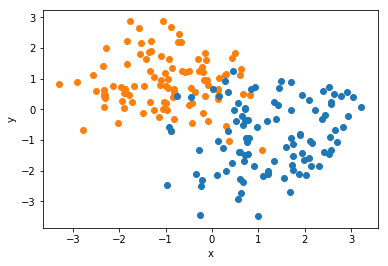

In [4]:
fig,ax = plt.subplots()
ax.scatter(X1[:,0], X1[:,1], c='C1')
ax.scatter(X2[:,0], X2[:,1], c='C0')
ax.set_xlabel('x')
ax.set_ylabel('y')

In [5]:
X = np.append(X1, X2, axis=0)
y = np.append(y1, y2)

Train and test split

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2, random_state=42)

In [7]:
len(X_train)

160

Text(0,0.5,'y')

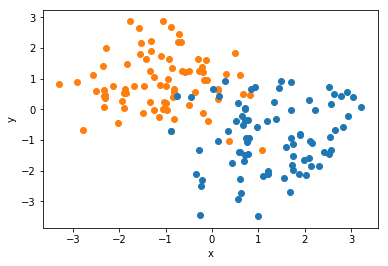

In [8]:
fig,ax = plt.subplots()
class0 = y_train == 0
class1 = y_train == 1
ax.scatter(X_train[class0,0], X_train[class0,1], c='C1')
ax.scatter(X_train[class1,0], X_train[class1,1], c='C0')
ax.set_xlabel('x')
ax.set_ylabel('y')

## Create classifiers

Single decision tree

In [9]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=2)

AdaBoost trees

In [10]:
bdt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                         n_estimators=100,
                         learning_rate=0.15,
                         algorithm="SAMME"
                        )

In [11]:
bdt.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.15, n_estimators=100, random_state=None)

In [12]:
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Test score

In [13]:
bdt.score(X_test, y_test)

0.90000000000000002

In [14]:
dt_gini.score(X_test, y_test)

0.92500000000000004

## Prediction

In [15]:
plot_step = 0.02

In [16]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

In [17]:
Z_dt  = dt_gini.predict(np.c_[xx.ravel(), yy.ravel()])
Z_bdt = bdt.predict(np.c_[xx.ravel(), yy.ravel()])

Z_bdt = Z_bdt.reshape(xx.shape)
Z_dt  = Z_dt.reshape(xx.shape)

Text(0,0.5,'y')

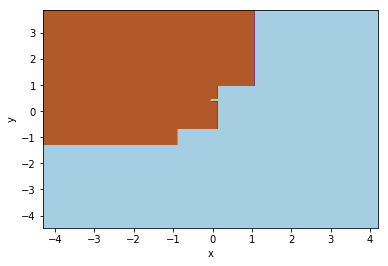

In [18]:
cs = plt.contourf(xx, yy, Z_bdt, cmap=plt.cm.Paired_r)
plt.axis("tight")
plt.xlabel('x')
plt.ylabel('y')

Text(0,0.5,'y')

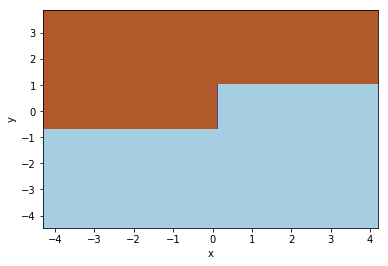

In [19]:
cs = plt.contourf(xx, yy, Z_dt, cmap=plt.cm.Paired_r)
plt.axis("tight")
plt.xlabel('x')
plt.ylabel('y')

BDT estimators

In [20]:
len(bdt.estimators_)

100

In [21]:
bdt_dt0 = bdt.estimators_[0]
bdt_dt1 = bdt.estimators_[1]

Text(0,0.5,'Frequency')

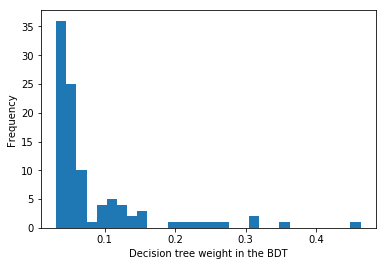

In [22]:
fig, ax = plt.subplots()
ax.hist(bdt.estimator_weights_, bins=30);
ax.set_xlabel('Decision tree weight in the BDT')
ax.set_ylabel("Frequency")

In [23]:
export_graphviz(bdt_dt0, 'bdt_dt0.dot', feature_names=["x", "y"], filled=True, class_names=["orange", "blue"])
export_graphviz(bdt_dt1, 'bdt_dt1.dot', feature_names=["x", "y"], filled=True)
export_graphviz(dt_gini, 'single_dt1.dot', feature_names=["x", "y"], filled=True)

In [24]:
call(['dot', '-Tpng', 'bdt_dt0.dot', '-o', 'bdt_dt0.png', '-Gdpi=600'])
call(['dot', '-Tpng', 'bdt_dt1.dot', '-o', 'bdt_dt1.png', '-Gdpi=600'])
call(['dot', '-Tpng', 'single_dt1.dot', '-o', 'single_dt1.png', '-Gdpi=600'])

0

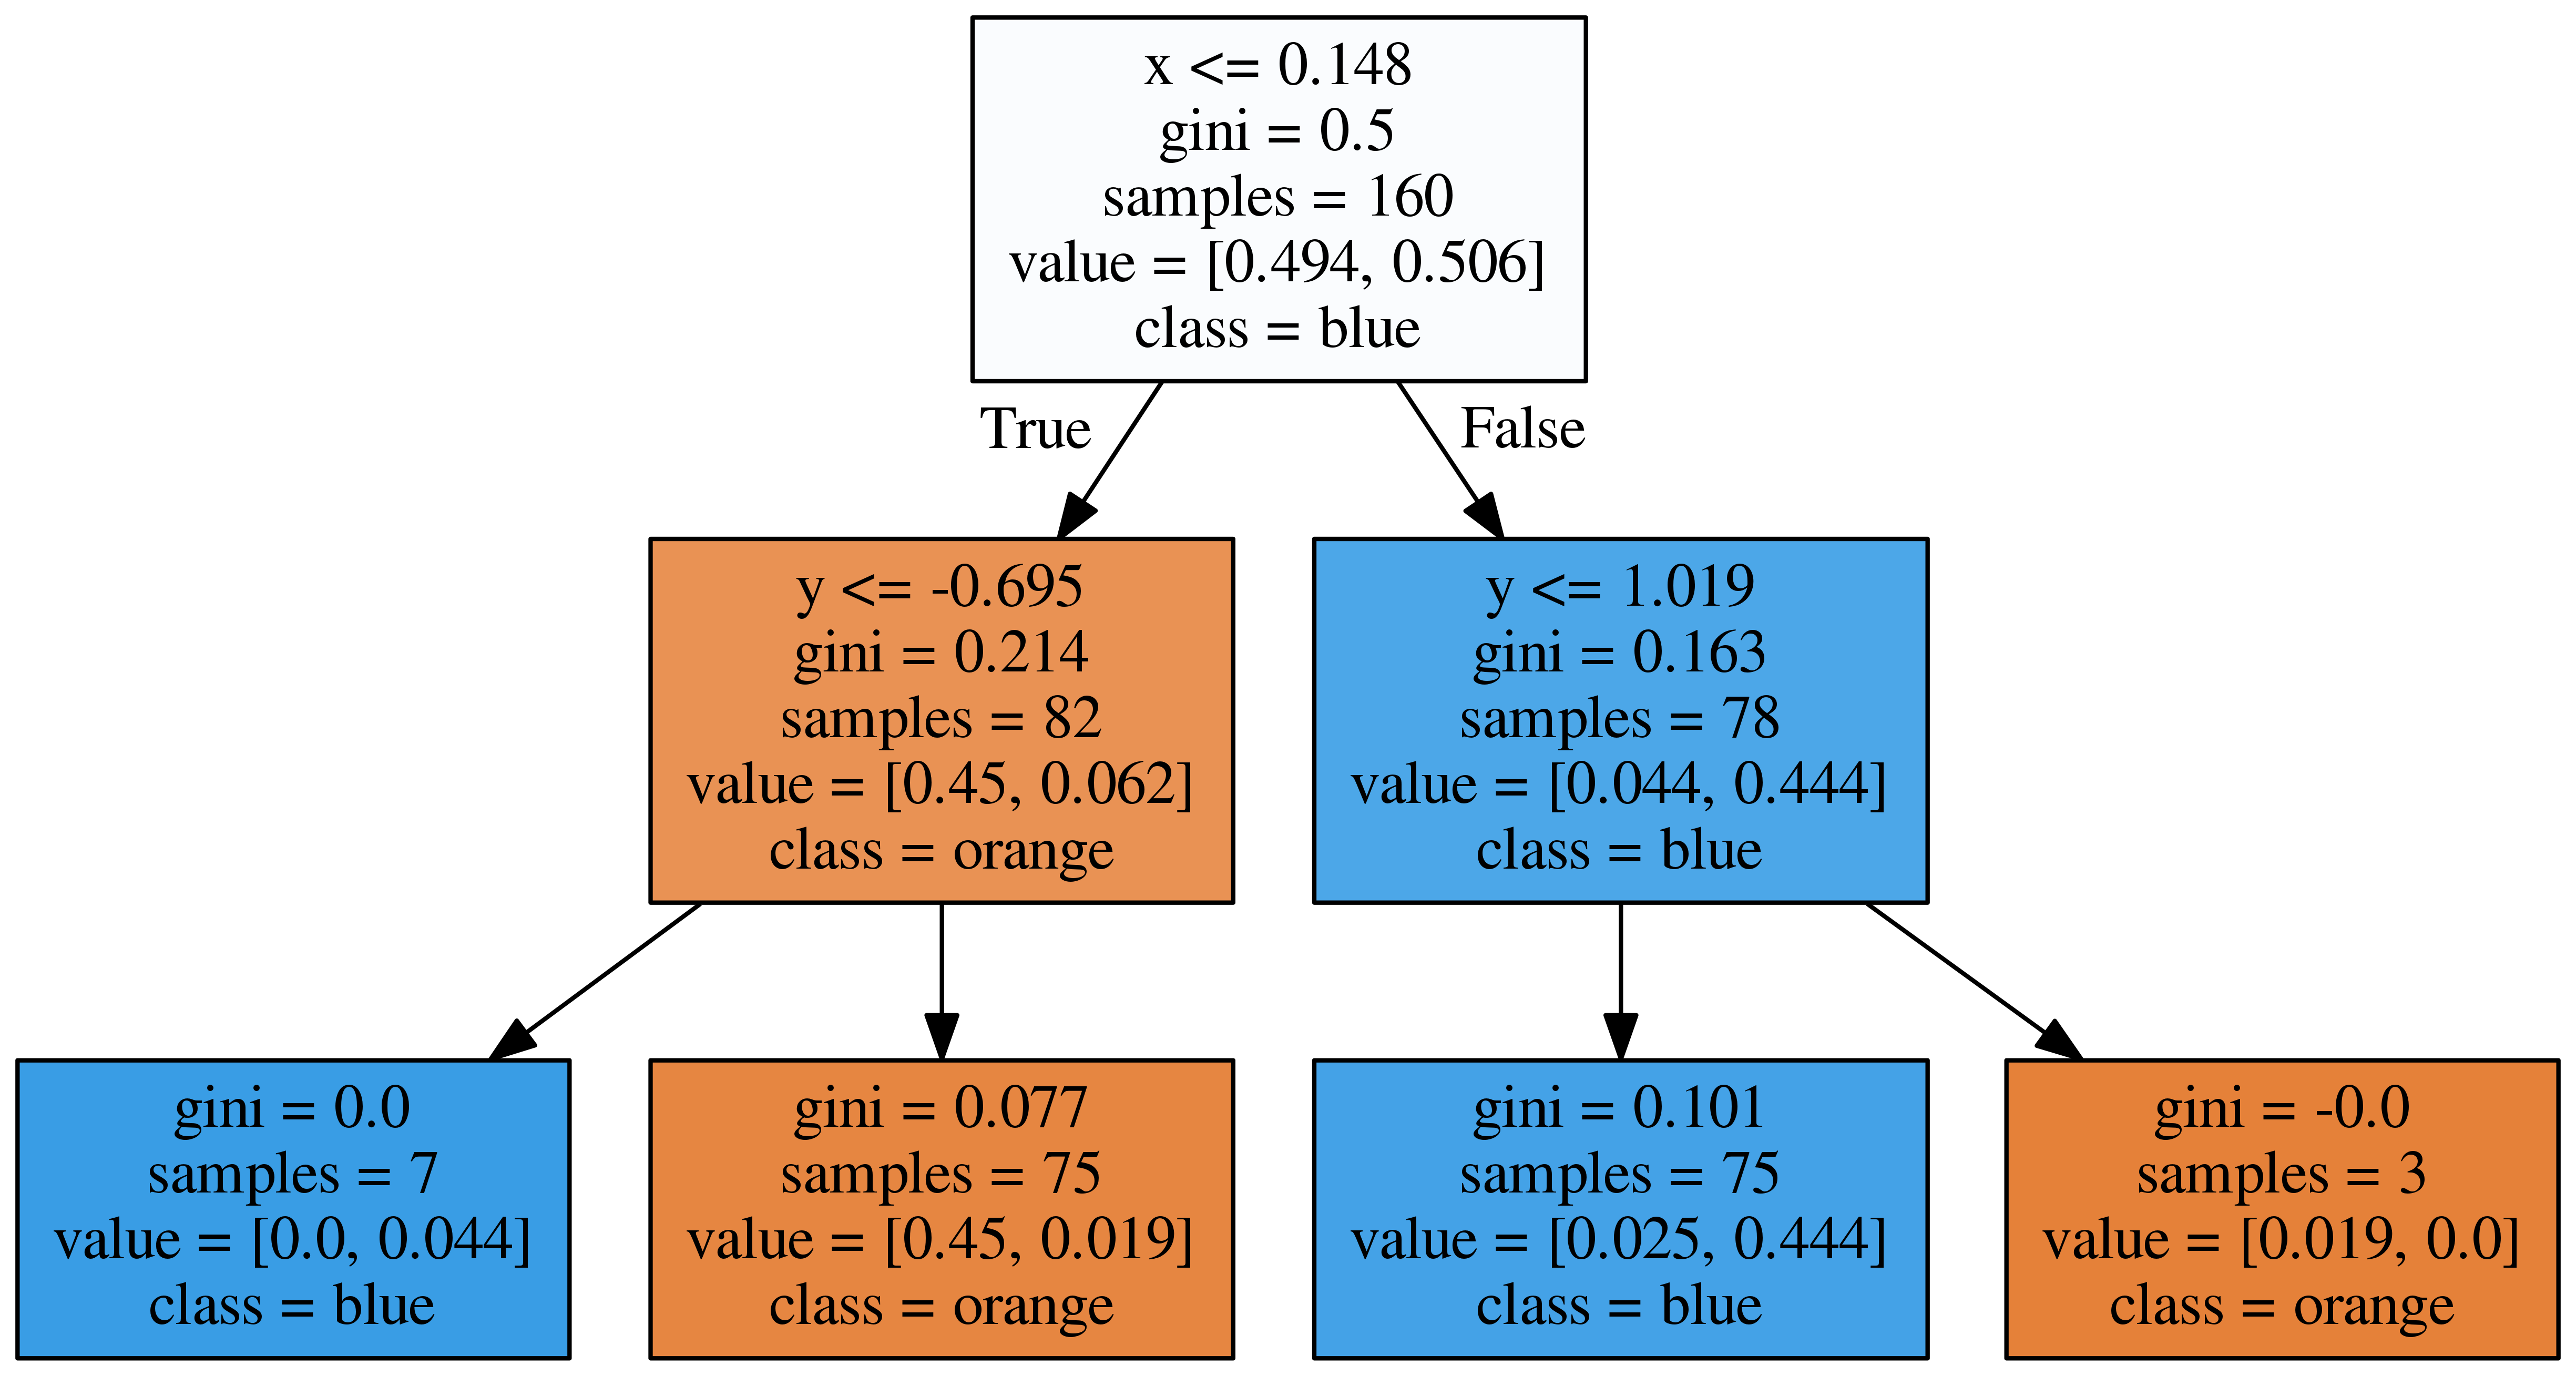

In [25]:
Image(filename='bdt_dt0.png')

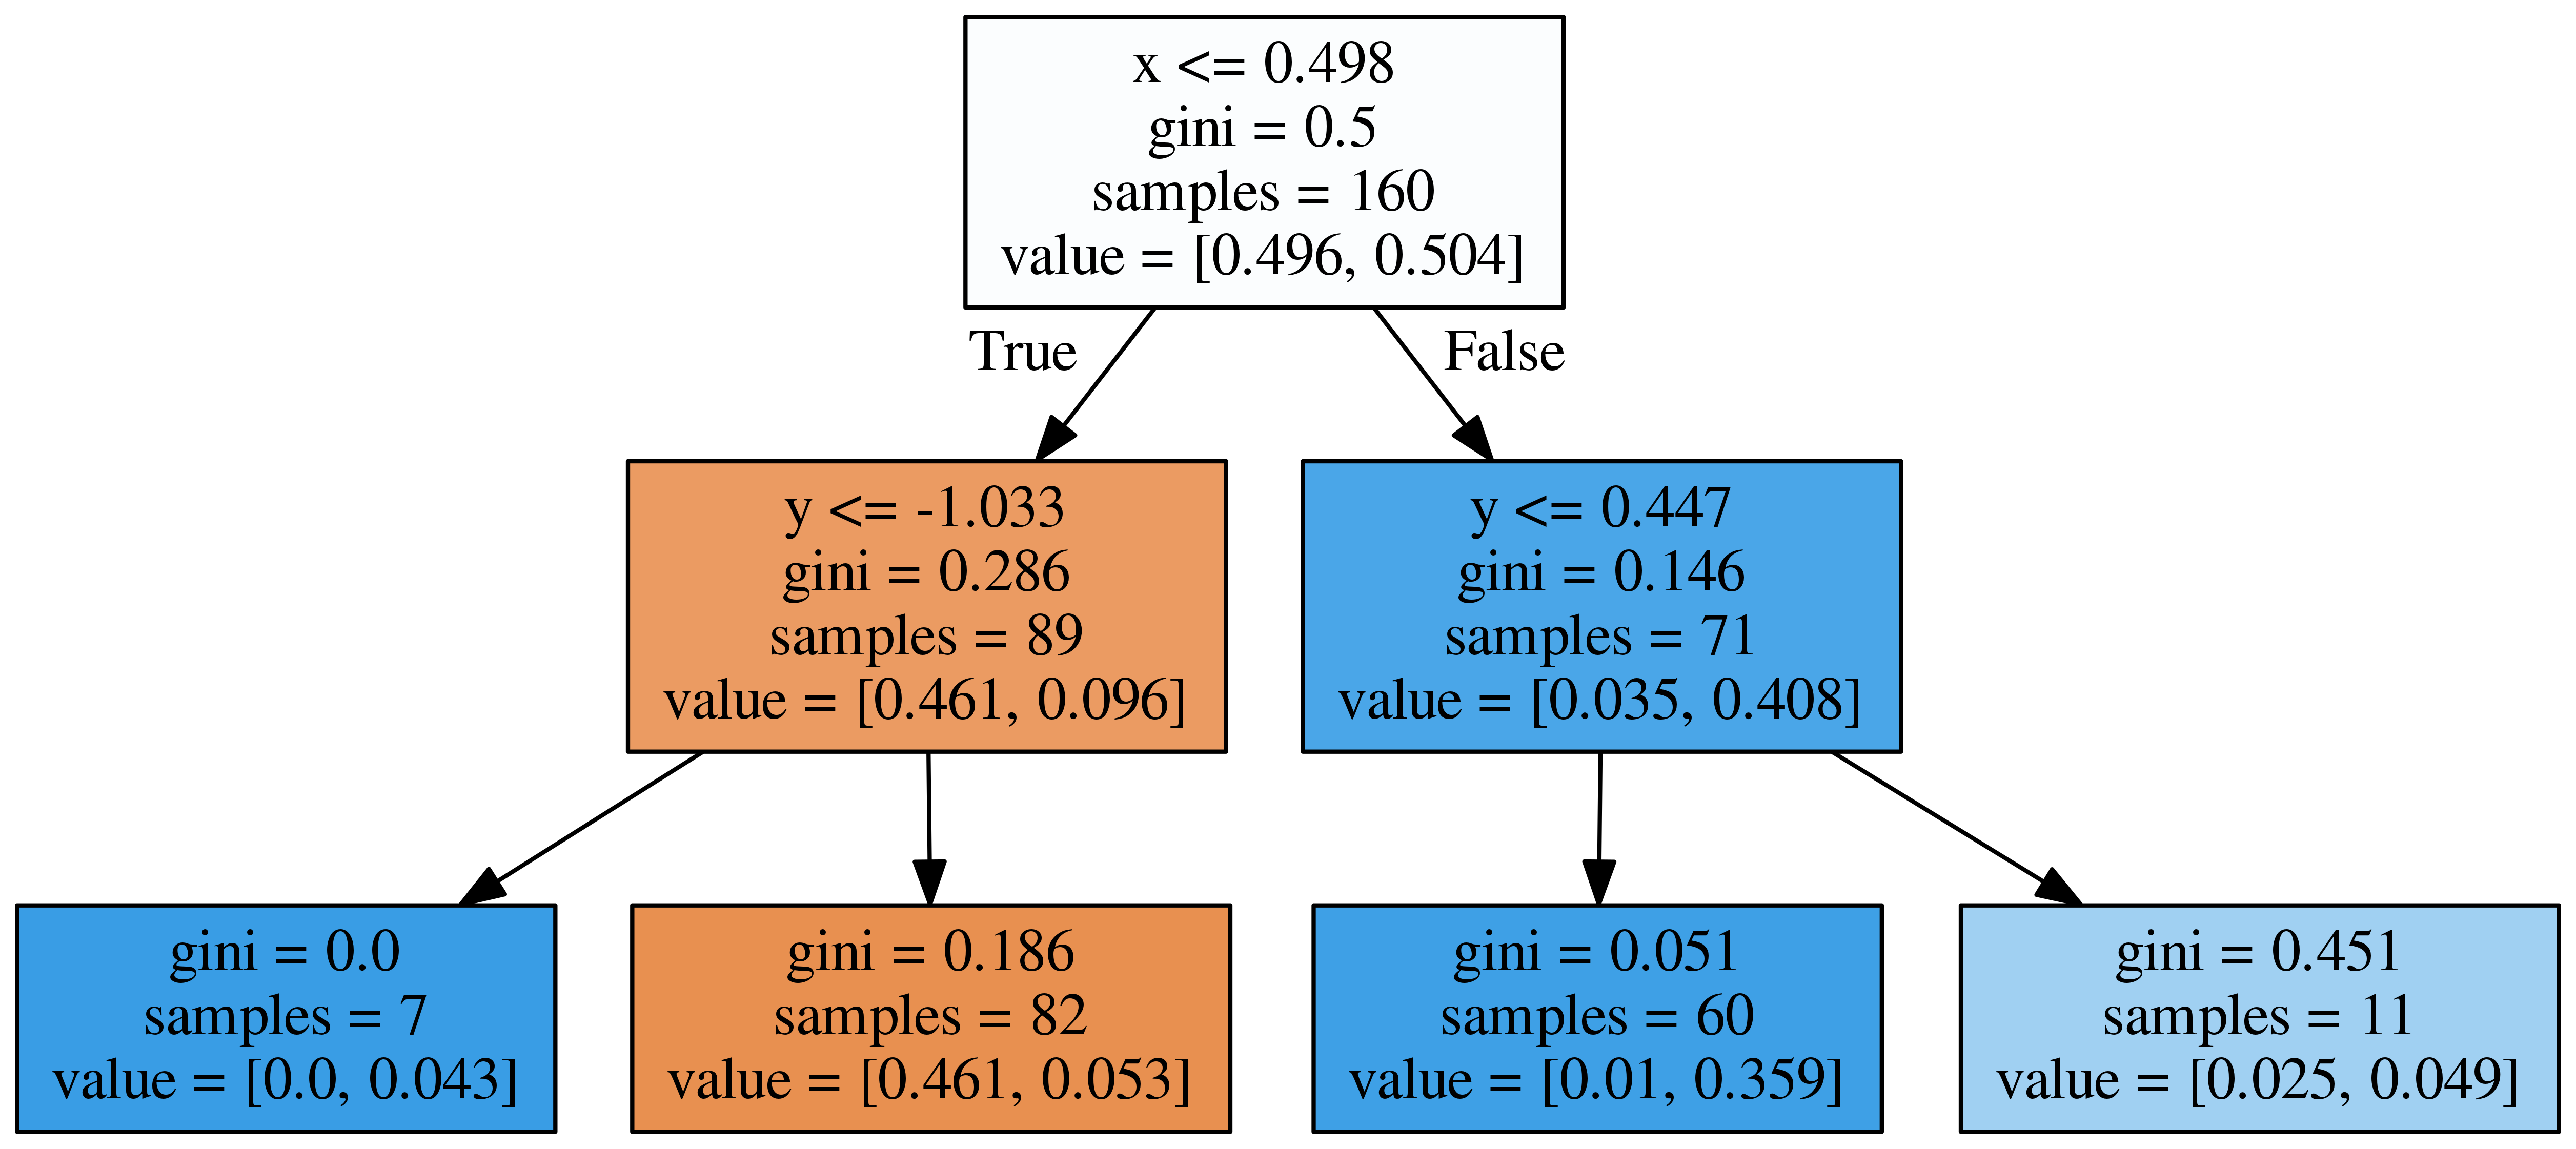

In [26]:
Image(filename='bdt_dt1.png')

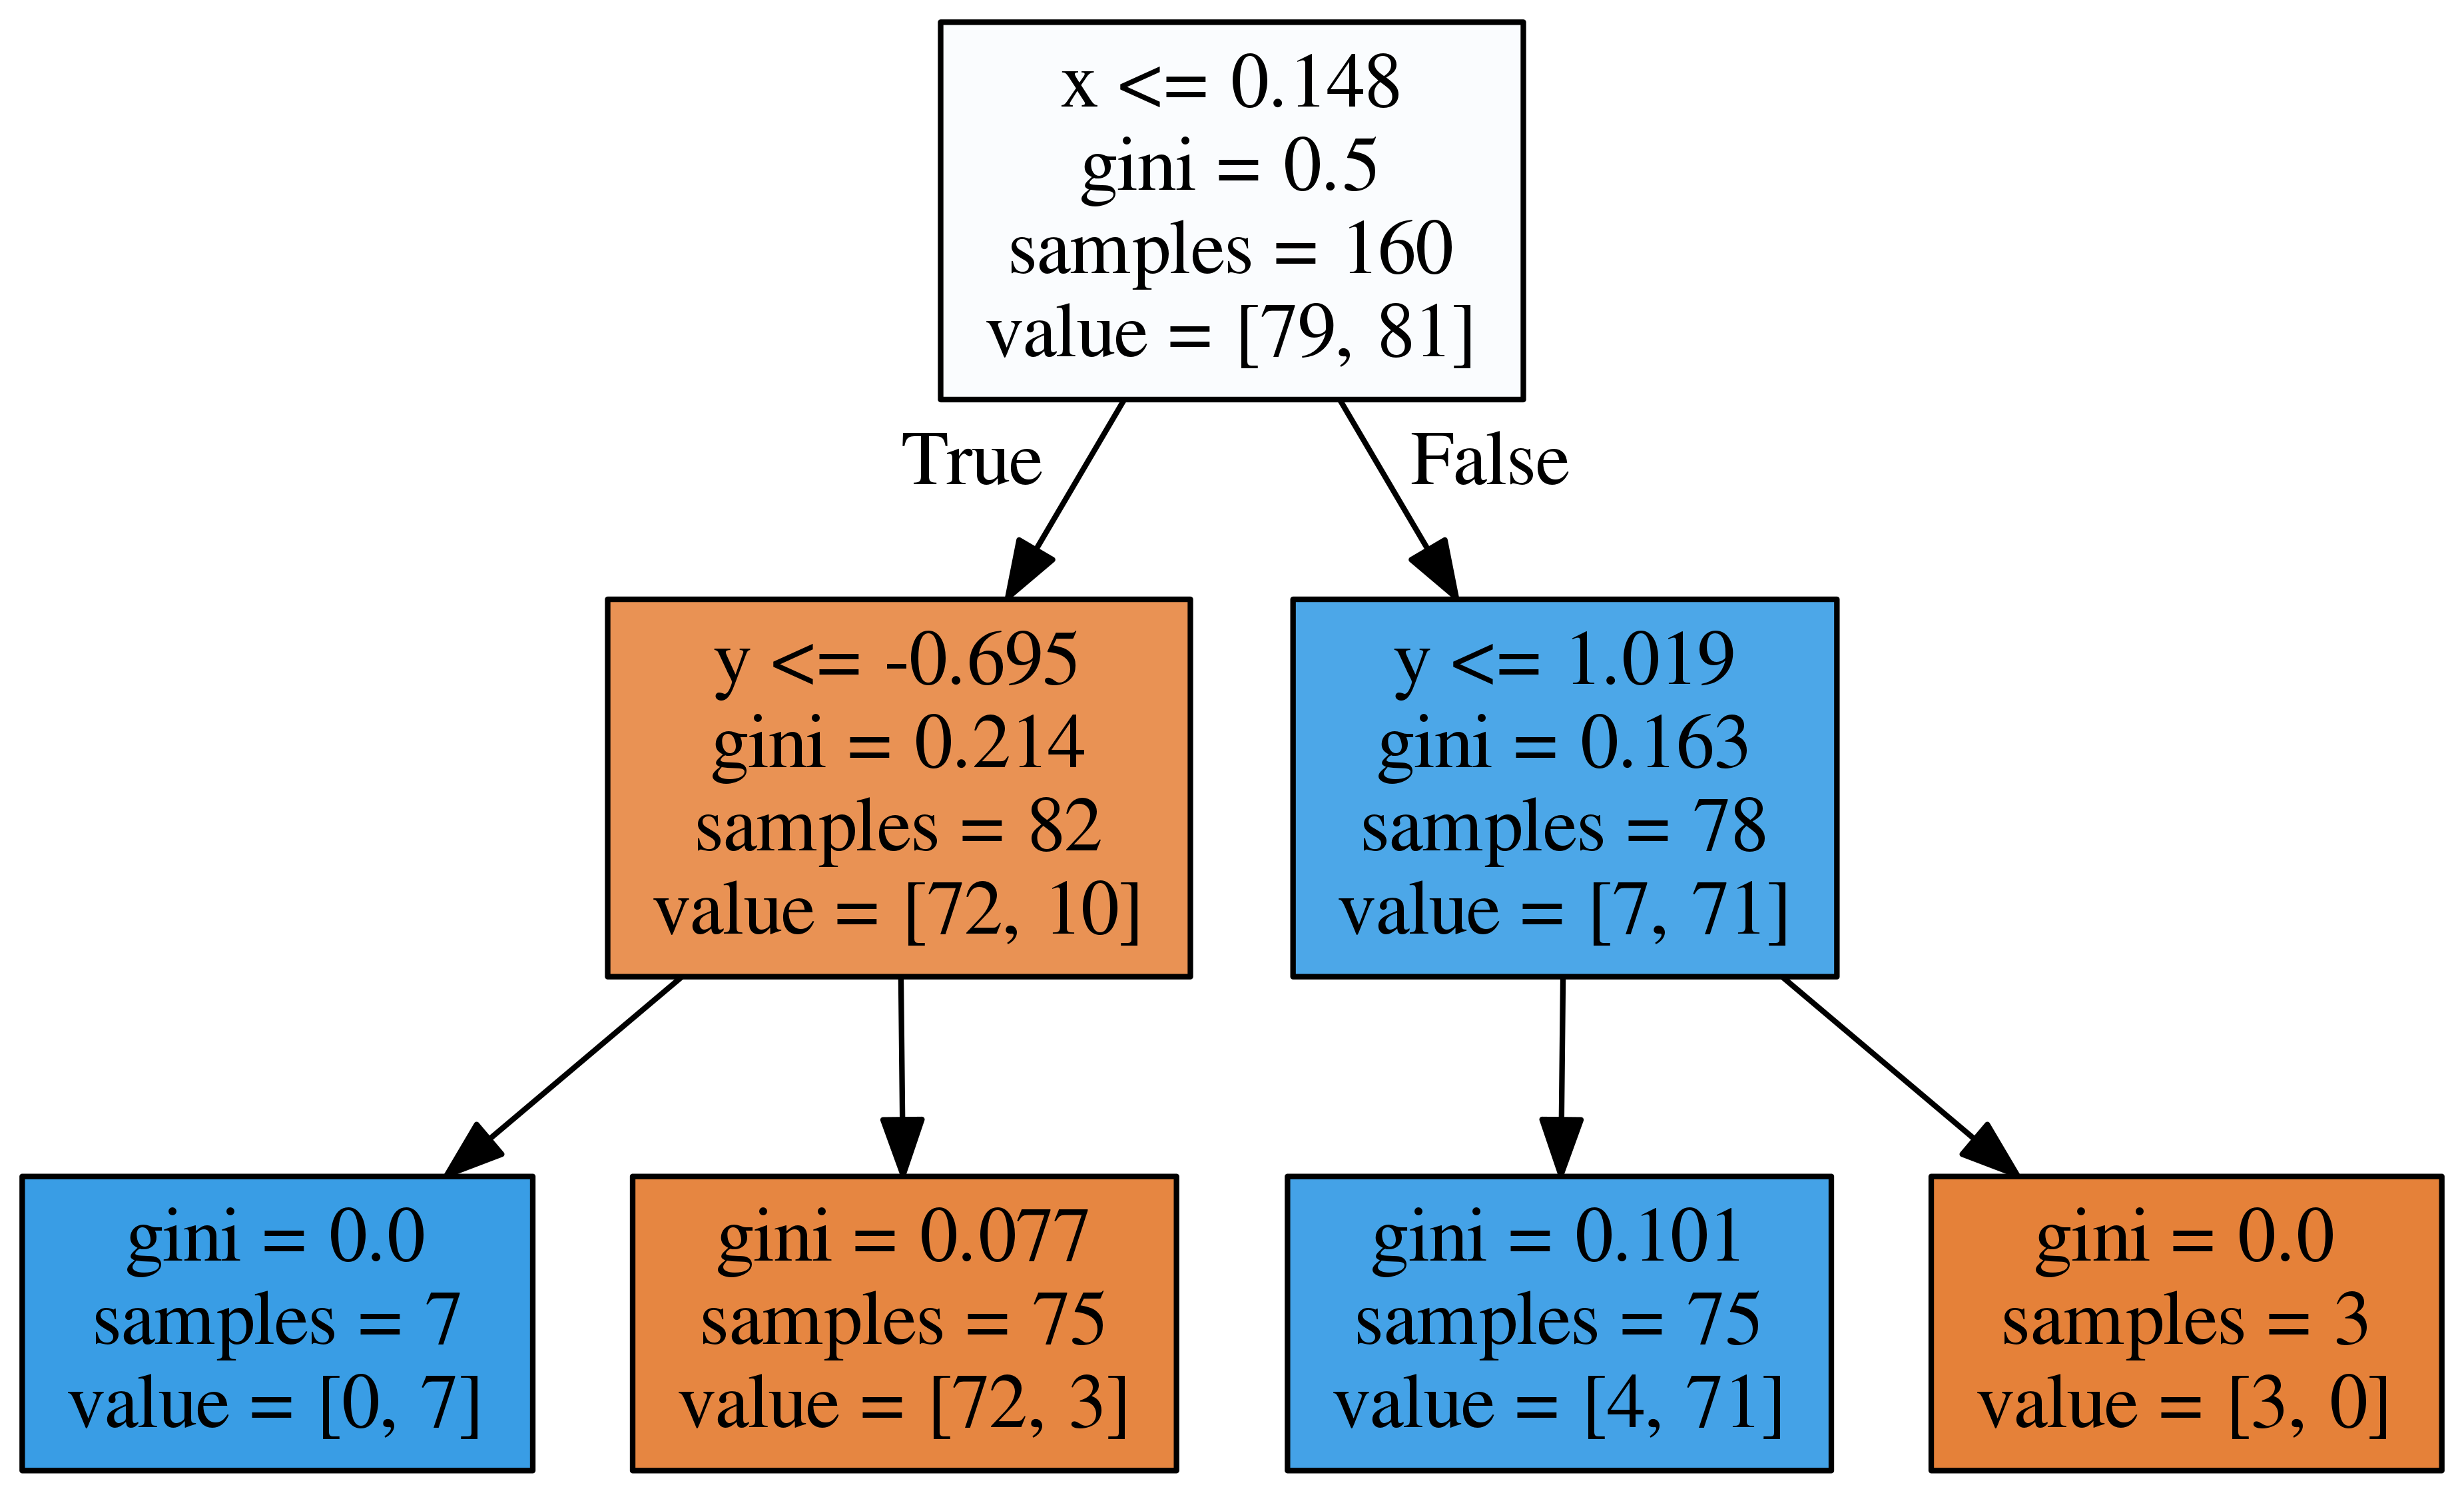

In [27]:
Image(filename='single_dt1.png')

## Second toy example

Construct dataset

In [28]:
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)

In [29]:
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

AdaBoosted decision tree

In [30]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)


In [31]:
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

In [32]:
plot_colors = "br"
plot_step = 0.02
class_names = "AB"

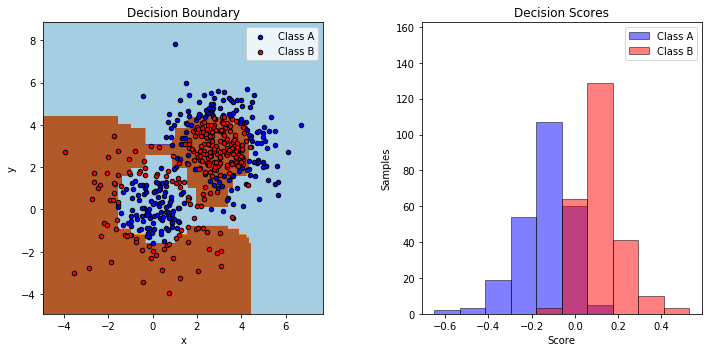

In [33]:
plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()